In [1]:
import numpy as np
from scipy.linalg import eigh, null_space
import matplotlib.pyplot as plt

# Exercise 1

- For symmetric matrices, $AA^{-1} = \Gamma^T \Lambda \Gamma \Gamma^T \Lambda^{-1} \Gamma
= \Gamma^T \Lambda \Lambda^{-1} \Gamma
= \Gamma^T \Gamma
= I$
- In other words, A and its inverse have the same eigenvector matrices (which are orthogonal)
- Additionally, the eigenvalue matrix of the inverse is the reciprocals of the regular eigenvalue matrix

In [2]:
# Generate a symmetric matrix
A = np.random.randn(4,4)
A = A.T @ A
A_i = np.linalg.inv(A)

L_A = np.linalg.eig(A)[0]
L_A_i = np.linalg.eig(A_i)[0]
print(np.sort(L_A))
print(np.sort(L_A_i))
print(np.sort(1/L_A))

[0.08822015 1.24586997 2.54840569 5.38141368]
[ 0.18582478  0.3924022   0.80265198 11.33527936]
[ 0.18582478  0.3924022   0.80265198 11.33527936]


# Exercise 2

In [3]:
A = np.array([-1, 1, -1, 2]).reshape(2,2)
evals, evecs = np.linalg.eig(A)
nvecs = np.random.randn(2,2)
Av = A @ evecs
Nv = A @ nvecs

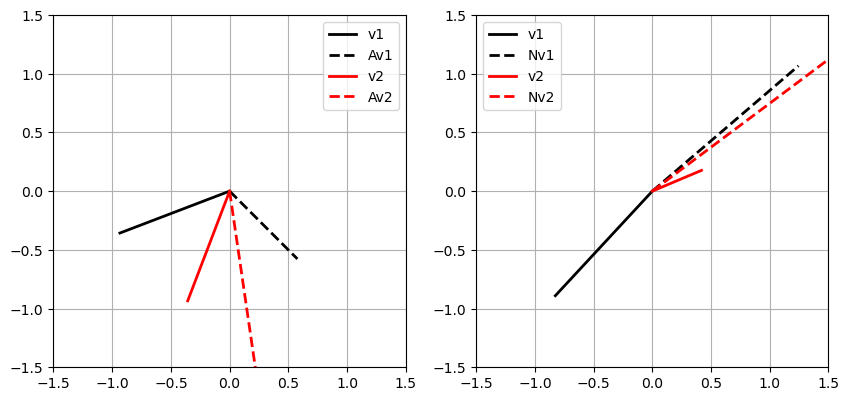

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))

# Plot using rows instead of columns - no longer an invariant subspace
ax[0].plot([0, evecs[0,0]], [0, evecs[0,1]], "k", linewidth = 2, label = "v1")
ax[0].plot([0, Av[0,0]], [0, Av[0,1]], "k--", linewidth = 2, label = "Av1")
ax[0].plot([0, evecs[1,0]], [0, evecs[1,1]], "r", linewidth = 2, label = "v2")
ax[0].plot([0, Av[1,0]], [0, Av[1,1]], "r--", linewidth = 2, label = "Av2")
# Non-eigenvectors
ax[1].plot([0, nvecs[0,0]], [0, nvecs[0,1]], "k", linewidth = 2, label = "v1")
ax[1].plot([0, Nv[0,0]], [0, Nv[0,1]], "k--", linewidth = 2, label = "Nv1")
ax[1].plot([0, nvecs[1,0]], [0, nvecs[1,1]], "r", linewidth = 2, label = "v2")
ax[1].plot([0, Nv[1,0]], [0, Nv[1,1]], "r--", linewidth = 2, label = "Nv2")

for i in range(2):
    ax[i].axis("square")
    ax[i].set_xlim([-1.5,1.5])
    ax[i].set_ylim([-1.5,1.5])
    ax[i].grid()
    ax[i].legend()

# Exercise 3

In [5]:
# Generate symmetric matrix (of integers) with transpose method
N = 5
recon_acc = np.zeros(5)
A = np.random.randn(N, N)
A = np.round(A.T + A)

d, V = np.linalg.eig(A)
D = np.diag(d)
A_recon = V @ D @ V.T
recon_acc[0] = np.sqrt(np.sum((A - A_recon)**2))
print(np.round(A - A_recon, 4))
print(f"Frobenius distance: {recon_acc[0]}")

[[ 0. -0.  0.  0. -0.]
 [-0. -0.  0.  0.  0.]
 [ 0.  0.  0. -0. -0.]
 [ 0.  0. -0.  0.  0.]
 [-0.  0. -0.  0.  0.]]
Frobenius distance: 2.8809793222289737e-15


In [6]:
# Permute columns of eigenvalue matrix
D_perm = np.diag(d[np.random.permutation(N)])
A_recon = V @ D_perm @ V.T
recon_acc[1] = np.sqrt(np.sum((A - A_recon)**2))
print(np.round(A - A_recon, 4))
print(f"Frobenius distance: {recon_acc[1]}")

[[-1.1185 -1.5994 -0.5403 -0.2705 -0.4979]
 [-1.5994  1.017   0.3843 -0.2747  0.1796]
 [-0.5403  0.3843  0.1441 -0.0914  0.0717]
 [-0.2705 -0.2747 -0.0914 -0.0616 -0.0902]
 [-0.4979  0.1796  0.0717 -0.0902  0.019 ]]
Frobenius distance: 3.034250311359961


In [7]:
# Swap max and mix eigenvalues
i = np.arange(N)
a, b = np.argsort(d)[0], np.argsort(d)[-1]
i[a], i[b] = b, a
D_perm = np.diag(d[i])
A_recon = V @ D_perm @ V.T
recon_acc[2] = np.sqrt(np.sum((A - A_recon)**2))
print(np.round(A - A_recon, 4))
print(f"Frobenius distance: {recon_acc[2]}")

[[ 1.6013 -3.4218 -0.564   1.4372 -0.6473]
 [-3.4218  5.1323  2.6403  0.9825  1.3961]
 [-0.564   2.6403 -0.7463 -3.1752  0.2195]
 [ 1.4372  0.9825 -3.1752 -6.2489 -0.6051]
 [-0.6473  1.3961  0.2195 -0.6051  0.2616]]
Frobenius distance: 11.762908649072372


In [8]:
# Swap two largest eigenvalues
i = np.arange(N)
a, b = np.argsort(d)[-2:]
i[a], i[b] = b, a
D_perm = np.diag(d[i])
A_recon = V @ D_perm @ V.T
recon_acc[3] = np.sqrt(np.sum((A - A_recon)**2))
print(np.round(A - A_recon, 4))
print(f"Frobenius distance: {recon_acc[3]}")

[[ 0.2154 -0.3657 -0.1423  0.0357 -0.1044]
 [-0.3657  0.5312  0.3589 -0.1565  0.4169]
 [-0.1423  0.3589 -0.0597  0.1018 -0.2449]
 [ 0.0357 -0.1565  0.1018 -0.0965  0.2389]
 [-0.1044  0.4169 -0.2449  0.2389 -0.5905]]
Frobenius distance: 1.38976777919174


In [9]:
# Swap two smallest eigenvalues
i = np.arange(N)
a, b = np.argsort(d)[:2]
i[a], i[b] = b, a
D_perm = np.diag(d[i])
A_recon = V @ D_perm @ V.T
recon_acc[4] = np.sqrt(np.sum((A - A_recon)**2))
print(np.round(A - A_recon, 4))
print(f"Frobenius distance: {recon_acc[4]}")

[[-0.0686 -0.1954  0.6739  0.4808 -0.2108]
 [-0.1954 -0.1165 -0.0042  0.9114  0.3227]
 [ 0.6739 -0.0042  1.79   -2.72   -1.965 ]
 [ 0.4808  0.9114 -2.72   -2.8938  0.5159]
 [-0.2108  0.3227 -1.965   0.5159  1.2889]]
Frobenius distance: 6.301963401793259


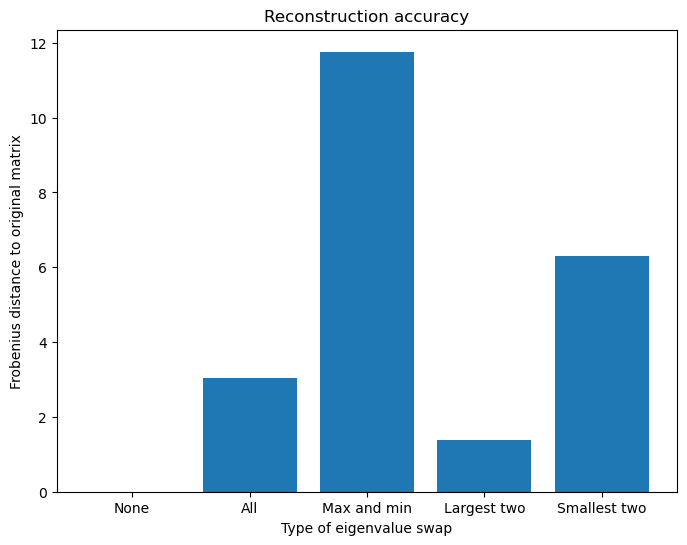

In [10]:
plt.figure(figsize = (8,6))
plt.bar(range(5), recon_acc)
plt.xticks(range(5), labels = ["None", "All", "Max and min", "Largest two", "Smallest two"])
plt.ylabel("Frobenius distance to original matrix")
plt.xlabel("Type of eigenvalue swap")
plt.title("Reconstruction accuracy")
plt.savefig('Figure_13_03.png',dpi=300)
plt.show()

- The error induced by eigenvalue swaps depends on the difference between the two values
- Therefore, swapping the smallest two might cause more error if the gap is larger

# Exercise 4

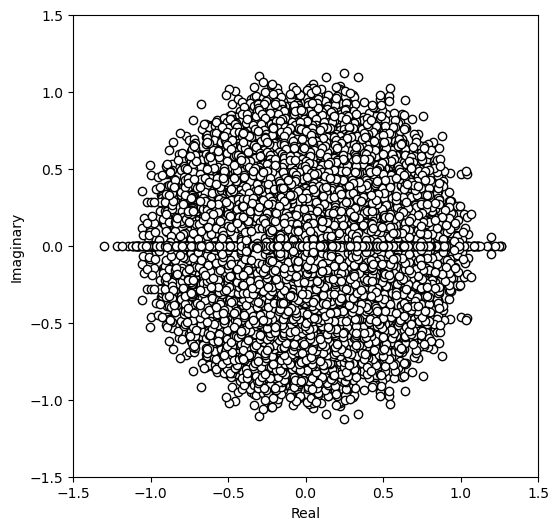

In [11]:
N = 123
S = 42
X = np.random.randn(N, S, S)
evals = [np.linalg.eig(X[i,:,:])[0] / np.sqrt(S) for i in range(N)]

plt.figure(figsize = (6,6))
plt.plot(np.real(evals), np.imag(evals), "ko", markerfacecolor = "white")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.savefig('Figure_13_04.png',dpi=300)
plt.show()

# Exercise 5

In [12]:
N = 3
A = np.random.randn(N, N)
A = A.T @ A
evals, evecs = np.linalg.eig(A)

for i in range(N):
    null_v = null_space(A - evals[i] * np.eye(N))
    r = np.corrcoef(null_v.T, evecs[i])[0,1]
    print(f"Correlation between null(A-lI) and evec {i}: {np.abs(r):.2f}")

Correlation between null(A-lI) and evec 0: 1.00
Correlation between null(A-lI) and evec 1: 0.38
Correlation between null(A-lI) and evec 2: 0.92


- Note that this rarely gives 3 1's for the correlations
- Furthermore, there will occasionally be errors because the shifted matrix is full rank, i.e. the null space only contains the 0 vector
- Therefore, note that doing something as simple as shifting a matrix and finding its nullspace manually can cause serious numerical issues

# Exercise 6

In [13]:
D = np.diag(np.arange(1, 5))
Q, _ = np.linalg.qr(np.random.randn(4, 4))
A = Q @ D @ Q.T
print(np.round(A - A.T, 5))

[[ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [14]:
evals, evecs = np.linalg.eig(A)
print(evals)

[1. 2. 3. 4.]


# Exercise 7
- This exercise just asks you to repeat the regularization exercise but with matrices proportional to the average size of the matrix's eigenvalues

# Exercise 8
- To make X have the correlation of a correlation matrix R, let $Y = \Gamma_R \Lambda_R^{1/2} X$

In [15]:
R = np.array([1, .2, .9, .2, 1, .3, .9, .3, 1]).reshape(3,3)
d, V = np.linalg.eig(R)
D = np.diag(d)
X = np.random.randn(3, 10000)
X = V @ np.sqrt(D) @ X
np.corrcoef(X)

array([[1.        , 0.20466178, 0.90074198],
       [0.20466178, 1.        , 0.30371291],
       [0.90074198, 0.30371291, 1.        ]])

# Exercise 9
- To remove the correlation, let $Y = X^T \Gamma_R \Lambda_R^{1/2}$

In [16]:
X = X.T @ V @ np.sqrt(D)
np.round(np.corrcoef(X.T), 3)

array([[1.   , 0.011, 0.009],
       [0.011, 1.   , 0.002],
       [0.009, 0.002, 1.   ]])

# Exercise 10
- Notice how generalized eigendecomposition does not produce orthogonal eigenvectors, even when decomposing symmetric matrices

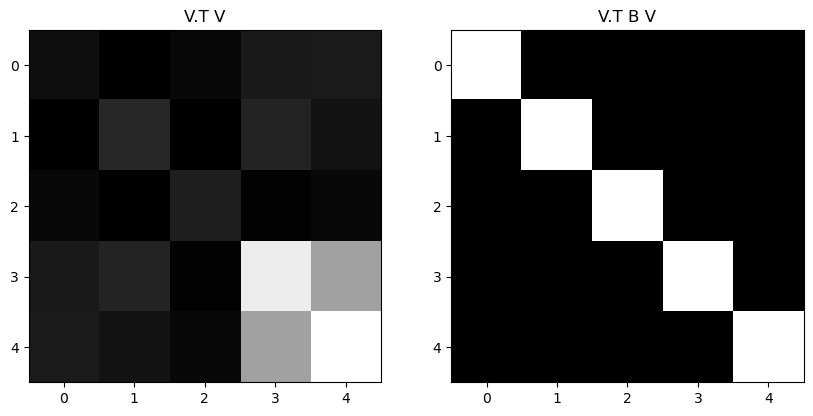

In [17]:
n = 5
A = np.random.randn(n,n)
A = A.T @ A
B = np.random.randn(n,n)
B = B.T @ B

evals, evecs = eigh(A, B)
VV = evecs.T @ evecs
VBV = evecs.T @ B @ evecs

fig, ax = plt.subplots(1, 2, figsize = (10,6))
ax[0].imshow(VV, cmap = "gray")
ax[0].set_title("V.T V")
ax[1].imshow(VBV, cmap = "gray")
ax[1].set_title("V.T B V")
plt.savefig('Figure_13_05.png',dpi=300)
plt.show()

# Exercise 11

In [18]:
A = np.random.randint(-14, 15, (4,4))
d, V = np.linalg.eig(A)
V = V * np.pi
D = np.diag(d)
Vi = np.linalg.inv(V)

# Check that diagonalization worked
print(np.round(V @ D @ Vi - A, 3))

[[-0.+0.j -0.+0.j -0.-0.j  0.+0.j]
 [-0.-0.j -0.-0.j -0.+0.j -0.-0.j]
 [-0.+0.j -0.+0.j  0.-0.j -0.+0.j]
 [-0.-0.j -0.+0.j -0.-0.j -0.+0.j]]


In [19]:
# Need to use complex conjugate instead of dot product for complex vector norms
for i in range(A.shape[0]):
    norm = np.sqrt(np.sum(V[:,i] * np.conj(V[:,i])))
    print(f"Eigenvector {i} has norm P{norm}")

Eigenvector 0 has norm P(3.1415926535897936+0j)
Eigenvector 1 has norm P(3.1415926535897936+0j)
Eigenvector 2 has norm P(3.141592653589793+0j)
Eigenvector 3 has norm P(3.141592653589793+0j)


In [20]:
# Repeated with a symmetric matrix
A = np.random.randint(-14, 15, (4,4))
A = A.T @ A
d, V = np.linalg.eig(A)
V = V * np.pi
D = np.diag(d)
Vi = V.T

# Check that diagonalization worked
print(np.round(V @ D @ Vi - A, 3))

[[ 2687.49  -2412.532  -478.959 -1525.572]
 [-2412.532  2252.88    141.914   895.83 ]
 [ -478.959   141.914  2421.402  1827.139]
 [-1525.572   895.83   1827.139  3672.016]]


In [21]:
# Check norms
for i in range(A.shape[0]):
    norm = np.sqrt(np.dot(V[:,i], (V[:,i])))
    print(f"Eigenvector {i} has norm P{norm}")

Eigenvector 0 has norm P3.1415926535897927
Eigenvector 1 has norm P3.141592653589793
Eigenvector 2 has norm P3.1415926535897936
Eigenvector 3 has norm P3.1415926535897927


- Notice how the matrix diagonalization fails because the matrix is scaled by $\pi$, and it's never factored out because we transpose the matrix instead of explicitly inverting it